# Data from: 
https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset

# import relevant libraries

In [1]:
## Data Handling ## 
import numpy as np
import pandas as pd
import os

## Visualization ## 
import matplotlib.pyplot as plt
import seaborn as sns

## Manipulating Data and Model Building ## 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

## transfer learning ## 
from tensorflow.keras.applications import MobileNetV2

## image generating and pre-processing ## 
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## results and performance analysis ## 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## ignore warnings ##
import warnings
warnings.filterwarnings("ignore")

2023-05-26 19:15:20.719805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exploratory Analysis

In [2]:
DIR = '../Downloads/fish_dataset/Fish_Dataset/Fish_Dataset' #Creating a master directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes

['Sea Bass',
 'Red Mullet',
 'Gilt-Head Bream',
 'Red Sea Bream',
 'Shrimp',
 'Black Sea Sprat',
 'Striped Red Mullet',
 'Hourse Mackerel',
 'Trout']

In [3]:

# Create a dataframe with a column which consists of all the filepaths (without GT) and its respective label as the other column

label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dirname.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label 
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [4]:
df.head()

,path,label
0,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Sea Bass
1,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Sea Bass
2,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Sea Bass
3,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Sea Bass
4,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Sea Bass


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [6]:
df.label.value_counts()

Sea Bass              1000
Red Mullet            1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Shrimp                1000
Black Sea Sprat       1000
Striped Red Mullet    1000
Hourse Mackerel       1000
Trout                 1000
Name: label, dtype: int64

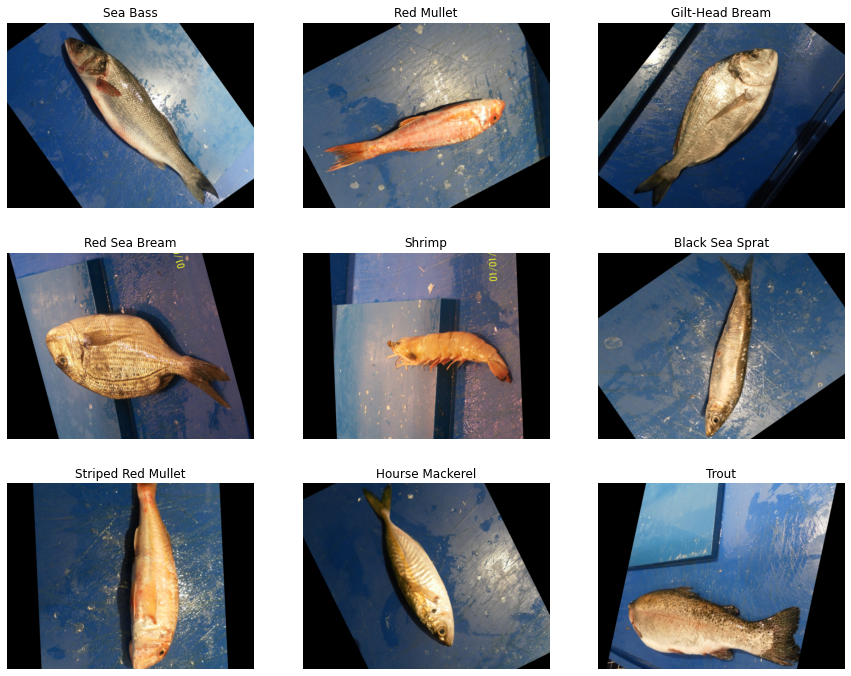

In [7]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

# Train-test-split

In [8]:
#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [9]:
train_df.shape

(7200, 2)

In [10]:
test_df.shape

(1800, 2)

# Image Generation and pre-processing

In [11]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )


Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [13]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


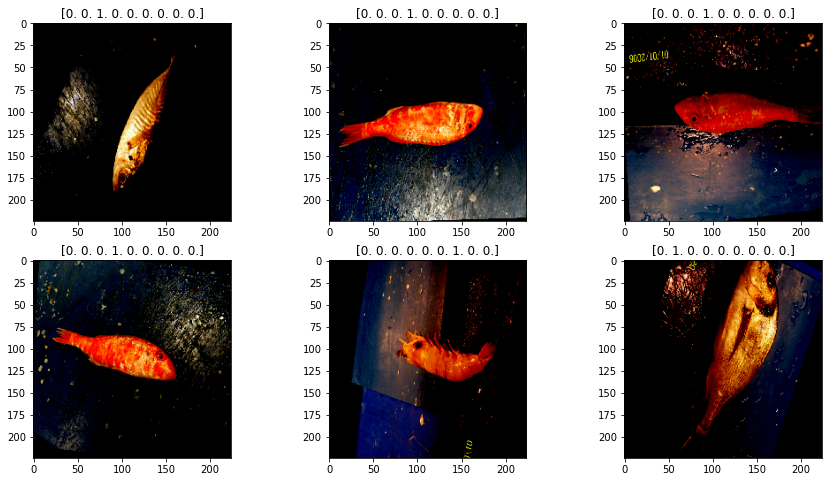

In [14]:
#Plotting images after pre-processing

fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

# Model training & evaluation

In [15]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

2023-05-26 19:15:34.026188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


180/180 [==============================] - ETA: 0s - loss: 0.1965 - accuracy: 0.9408

2023-05-26 19:17:12.752513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


180/180 [==============================] - 124s 675ms/step - loss: 0.1965 - accuracy: 0.9408 - val_loss: 0.0256 - val_accuracy: 0.9924
Epoch 2/5
180/180 [==============================] - 120s 664ms/step - loss: 0.0074 - accuracy: 0.9991 - val_loss: 0.0089 - val_accuracy: 0.9986
Epoch 3/5
180/180 [==============================] - 119s 660ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9979
Epoch 4/5
180/180 [==============================] - 119s 661ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/5
180/180 [==============================] - 120s 666ms/step - loss: 6.5058e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9993


In [17]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

2023-05-26 19:25:36.529368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test Loss: 0.00262
Test Accuracy: 99.94%


In [18]:
accuracy = history.history['accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

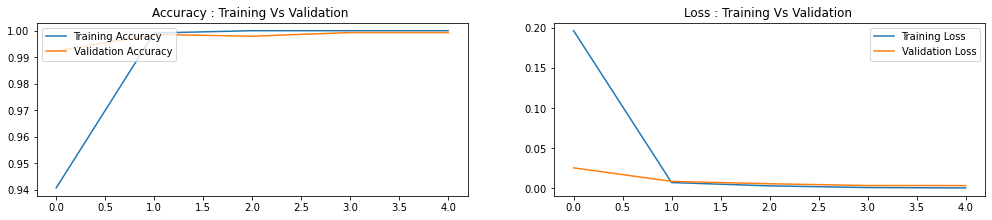

In [19]:
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(5), accuracy, label='Training Accuracy')
plt.plot(range(5), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

In [20]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

2023-05-26 19:38:16.694481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


57/57 [==============================] - 2506s 45s/step


In [21]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [22]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

,path,label,pred
0,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Hourse Mackerel,Hourse Mackerel
1,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
2,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Sea Bass,Sea Bass
3,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Shrimp,Shrimp
4,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Trout,Trout
5,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Trout,Trout
6,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Black Sea Sprat,Black Sea Sprat
7,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Trout,Trout
8,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Sea Bream,Red Sea Bream
9,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Shrimp,Shrimp


In [23]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

,path,label,pred
268,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Striped Red Mullet,Red Mullet


In [28]:
# show correct fish image 
pred_df[pred_df['label'] == 'Red Mullet']

,path,label,pred
1,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
32,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
33,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
40,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
42,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
...,...,...,...
1757,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
1762,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
1779,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet
1783,../Downloads/fish_dataset/Fish_Dataset/Fish_Da...,Red Mullet,Red Mullet


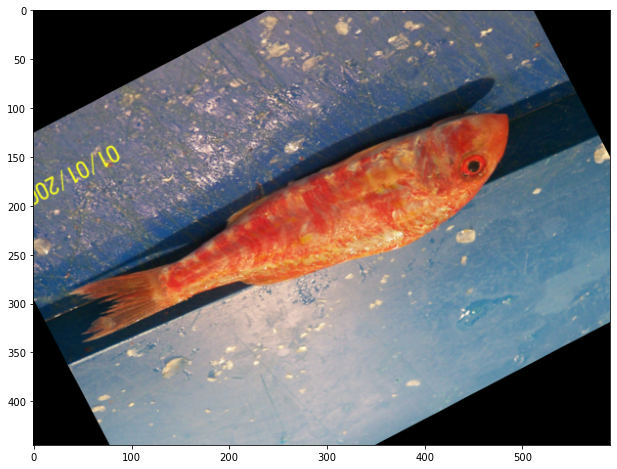

In [29]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[1]))

In [24]:
# which image is it?
pred_df.path[268]

'../Downloads/fish_dataset/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00791.png'

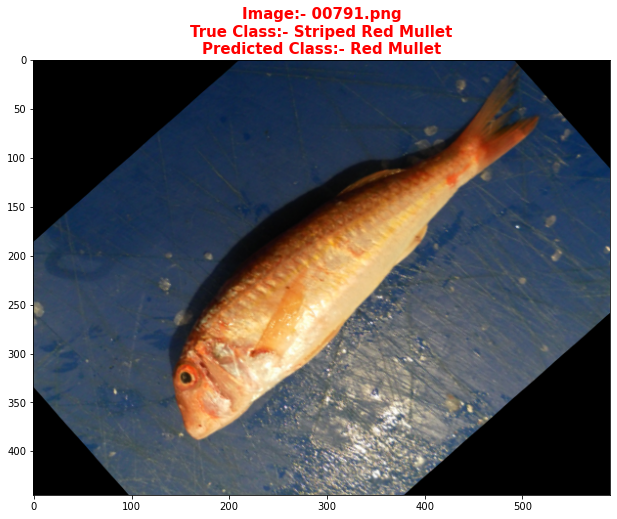

In [25]:
# Which image was it?
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[268]))
title1 = pred_df.path[268].split('/')[-2]
title2 = pred_df.path[268].split('/')[-1]
title3 = pred_df.pred[268]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

Accuracy Score: 0.9994444444444445


<AxesSubplot:>

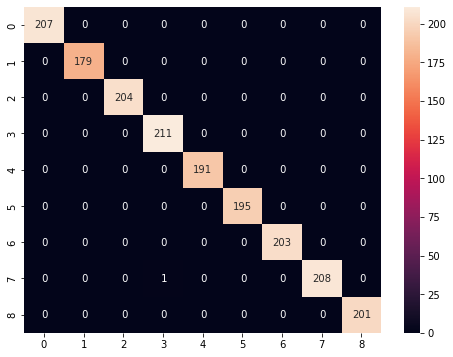

In [26]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

In [27]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       207
   Gilt-Head Bream       1.00      1.00      1.00       179
   Hourse Mackerel       1.00      1.00      1.00       204
        Red Mullet       1.00      1.00      1.00       211
     Red Sea Bream       1.00      1.00      1.00       191
          Sea Bass       1.00      1.00      1.00       195
            Shrimp       1.00      1.00      1.00       203
Striped Red Mullet       1.00      1.00      1.00       209
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800

